<a href="https://colab.research.google.com/github/Nsho0724/Covertype/blob/main/CoverType_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/content/drive/My Drive/CyberAgent/Covtype/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sample_submission = pd.read_csv(path + "sampleSubmission.csv")

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 1000000)

In [5]:
print(train.shape)
print(test.shape)

(15120, 56)
(565892, 55)


In [6]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
test.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [9]:
#少し上がった
train.loc[train['Vertical_Distance_To_Hydrology'] >=500,"Vertical_Distance_To_Hydrology"] = 400
test.loc[test['Vertical_Distance_To_Hydrology'] >=500,"Vertical_Distance_To_Hydrology"] = 400

In [10]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import  GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [11]:
#説明変数と目的変数に分割
X = train.drop(["Id","Cover_Type"],axis = 1)
y = train["Cover_Type"]
#標準化
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# test_sc = scaler.fit_transform(test)

In [12]:
lg = LGBMClassifier()
lg.fit(X,y)
lg_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [13]:
rf = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth= 20,min_samples_leaf=1)
rf.fit(X,y)
rf_scores = cross_validate(rf,X,y,scoring ="accuracy",cv =5)

In [14]:
# lr = LogisticRegression()
# lr.fit(X,y)
# lr_scores = cross_validate(lr,X,y,scoring ="accuracy",cv =5)

In [15]:
svc = SVC()
svc.fit(X,y)
svc_scores = cross_validate(lg,X,y,scoring ="accuracy",cv =5)

In [16]:
xg = XGBClassifier()
xgb_y = y-1
xg.fit(X,xgb_y)
xg_scores = cross_validate(xg,X,xgb_y,scoring ="accuracy",cv =5)

In [17]:
# knn = KNeighborsClassifier()
# knn.fit(X, y)
# knn_scores = cross_validate(knn,X,y,scoring ="accuracy",cv =5)

In [18]:
# mlp = MLPClassifier()
# mlp.fit(X, y)
# mlp_scores = cross_validate(mlp,X,y,scoring ="accuracy",cv =5)

In [19]:
def model_scores(model_scores):
    for key in model_scores.keys():
        print(key + ' test scores: ', model_scores[key])
    print("Average test score: ", model_scores["test_score"].mean())

In [20]:
# scores =[lg_scores,rf_scores,lr_scores,svc_scores,xg_scores,knn_scores,mlp_scores]
# scores_ =["LGBMClassifier","RandomForestClassifier","LogisticRegression","SVC","XGBClassifier","KNeighborsClassifier","MLPClassifier"]

In [21]:
scores =[lg_scores,rf_scores,svc_scores,xg_scores]
scores_ =["LGBMClassifier","RandomForestClassifier","SVC","XGBClassifier"]

In [22]:
for i in range(len(scores)):
  print(scores_[i])
  model_scores(scores[i])
  print("\n")

LGBMClassifier
fit_time test scores:  [1.53612399 1.51214433 1.87779641 3.62575412 1.51399207]
score_time test scores:  [0.11224437 0.09885621 0.23132634 0.09740949 0.10115743]
test_score test scores:  [0.76388889 0.7390873  0.76157407 0.78174603 0.84556878]
Average test score:  0.7783730158730158


RandomForestClassifier
fit_time test scores:  [2.19186997 2.17589831 3.05027509 2.48311901 2.01696467]
score_time test scores:  [0.08637786 0.08859229 0.09675574 0.08496165 0.08787084]
test_score test scores:  [0.74239418 0.73875661 0.76785714 0.79927249 0.85449735]
Average test score:  0.7805555555555556


SVC
fit_time test scores:  [1.58506393 1.4702518  1.45859838 1.49362803 1.5860827 ]
score_time test scores:  [0.11251831 0.09906936 0.12420177 0.10250998 0.1096518 ]
test_score test scores:  [0.76388889 0.7390873  0.76157407 0.78174603 0.84556878]
Average test score:  0.7783730158730158


XGBClassifier
fit_time test scores:  [23.56756926 22.67751384 22.63812542 20.65455794 22.60747361]
s

In [23]:
train.drop(['Id', 'Cover_Type'], axis=1, inplace=True)

In [24]:
feature_importances = pd.Series(lg.feature_importances_,index = train.columns).sort_values(ascending=False)
feature_importances

Elevation                             3311
Horizontal_Distance_To_Roadways       3114
Horizontal_Distance_To_Fire_Points    2879
Horizontal_Distance_To_Hydrology      1633
Vertical_Distance_To_Hydrology        1556
Hillshade_Noon                        1289
Aspect                                1229
Hillshade_9am                         1114
Hillshade_3pm                         1069
Slope                                  795
Wilderness_Area1                       220
Soil_Type10                            191
Wilderness_Area3                       174
Soil_Type2                             160
Soil_Type4                             153
Soil_Type33                            142
Soil_Type32                            140
Wilderness_Area4                       120
Soil_Type13                            110
Soil_Type31                            107
Soil_Type11                             98
Soil_Type17                             94
Soil_Type20                             90
Soil_Type6 

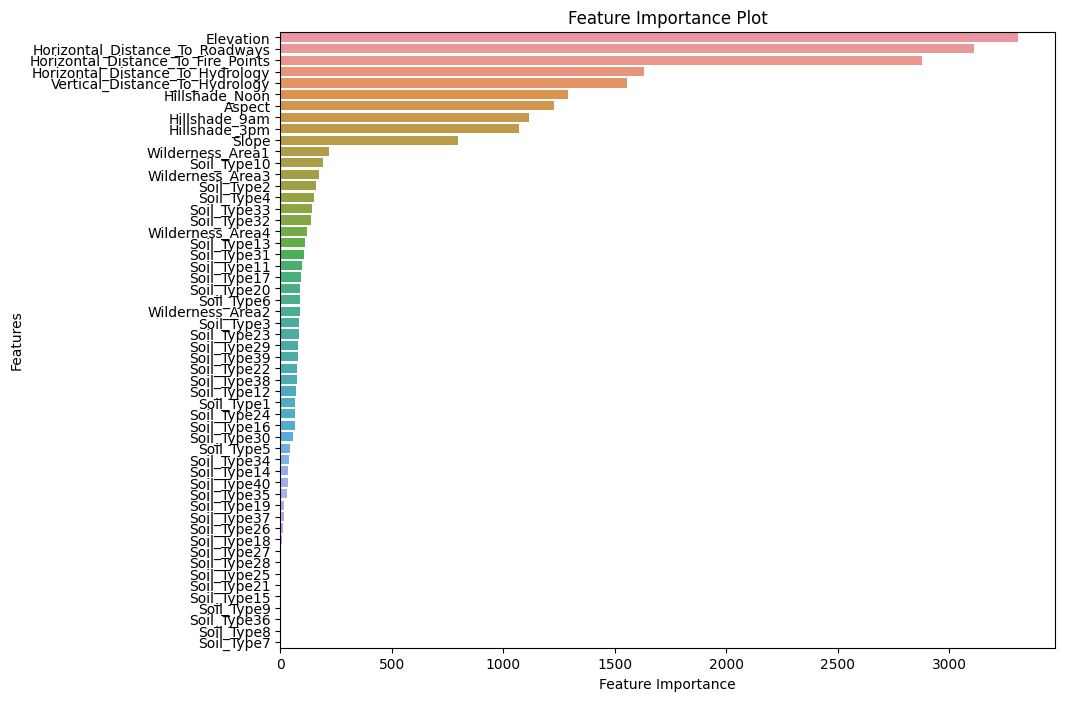

In [25]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Feature Importance Plot")
plt.show()